# Parameters To Test:
## Microwave Parameters:
* Microwave Power
* Microwave pulse start time
* Microwave frequency
## Laser Parameters:
* AOM Intensity 
* Pump \ Image length? 

In [1]:
import os


os.chdir(r"D:\NanoDiamond\PulseSequencer")

import numpy as np
from scipy import signal
import matplotlib.pyplot as plt

from IPython.display import display

from Interfaces.dataSaver import dataSaver

from Data.pulseConfiguration import pulseConfiguration
from Data.microwaveConfiguration import microwaveConfiguration
from Data.measurementType import measurementType

from LogicManagers.measurementManager import measurementManager
from LogicManagers.scanManager import scanManager
from LogicManagers import pulseAnalayzer

from time import sleep

In [2]:
def plotPulsesData(data):       
    xLabel = data.columns[0]
    yLabel = data.columns[1]

    t_image, y_image = pulseAnalayzer.getOnlyImage(data[xLabel], data[yLabel])
    t_pump, y_pump = pulseAnalayzer.getOnlyPump(data[xLabel], data[yLabel])
    
    # pump_intensity[AOM_intensity] = pulseAnalayzer.getIntegraionOfPump(data[xLabel], data[yLabel])
    # image_intensity[AOM_intensity] = pulseAnalayzer.getIntegraionOfImage(data[xLabel], data[yLabel])

    plt.plot(t_pump, y_pump, label = "Pump")
    plt.plot(t_image, y_image, label = "Image")
    
    plt.legend()

    plt.xlabel(xLabel)
    plt.ylabel(yLabel)

    plt.show()

In [3]:
Iterations = 1000

pulseConfig = pulseConfiguration()

pulseConfig.count_duration = 1
pulseConfig.samples_number = 1024
pulseConfig.threshold = 1.6
pulseConfig.iterations = Iterations
pulseConfig.pump_start = 0
pulseConfig.pump_duration = 4
pulseConfig.microwave_start = 5
pulseConfig.microwave_duration = 1
pulseConfig.image_start = 8
pulseConfig.image_duration = 4
pulseConfig.readout_start = 0
pulseConfig.low_voltage_AOM = 0
pulseConfig.high_voltage_AOM = 0.9
pulseConfig.measurement_type = measurementType.RabiPulse

microwaveConfig = microwaveConfiguration(
    trigMode = 0,
    centerFreq=2896,
    power=0)

In [4]:
measurement_manager = measurementManager()
measurement_manager.connectToEverything()

scan_manager = scanManager(measurement_manager)

The IP address of rp-f09ded.local is 132.72.13.15
Connecting to red pitaya: 132.72.13.15 1001
connected to pulse blaster
WindFreak is connected


AOM voltage: 0.9
Configuration sent to red pitaya
configured pulse blaster
Windfreak Rabi configuration sent: 2896 0 0
new rabi measurement started
recived new data, bytes: 4096
All the data was recived
disconnect from Red Pitaya
Connecting to red pitaya: 132.72.13.15 1001
0.0 8.006779661016948


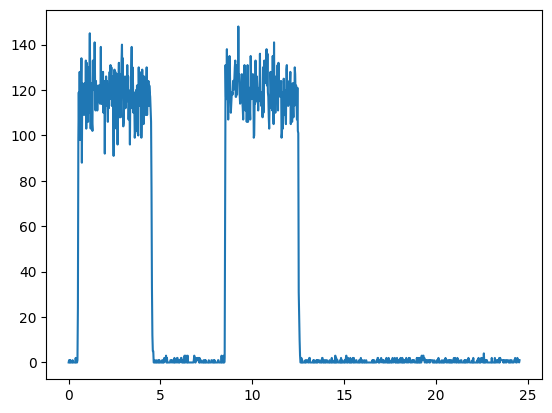

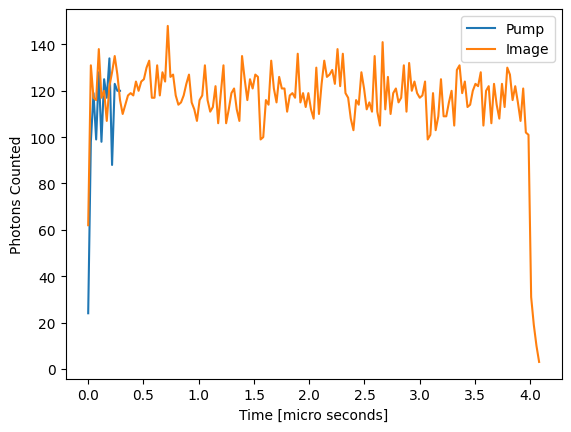

AOM voltage: 0.9
Configuration sent to red pitaya
configured pulse blaster
Windfreak Rabi configuration sent: 2896 0 0
new rabi measurement started
recived new data, bytes: 4096
All the data was recived
disconnect from Red Pitaya
Connecting to red pitaya: 132.72.13.15 1001
0.2 0.28957128407293103


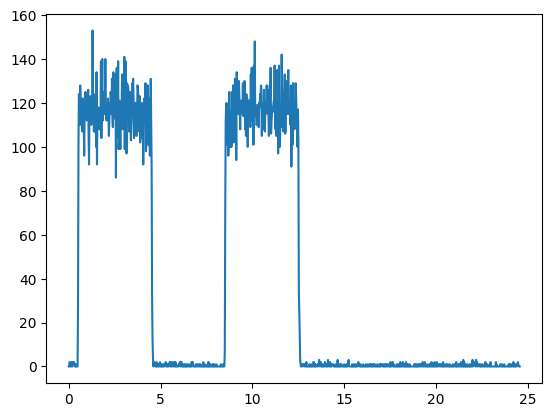

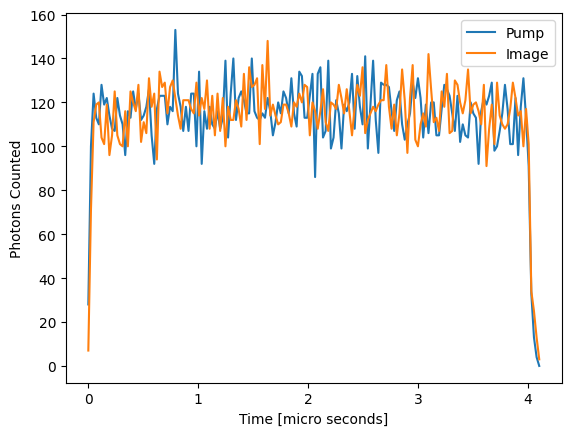

AOM voltage: 0.9
Configuration sent to red pitaya
configured pulse blaster
Windfreak Rabi configuration sent: 2896 0 0
new rabi measurement started
recived new data, bytes: 4096
All the data was recived
disconnect from Red Pitaya
Connecting to red pitaya: 132.72.13.15 1001
0.4 0.20886466848319718


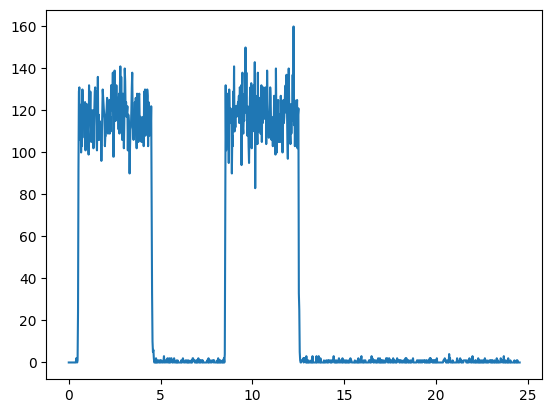

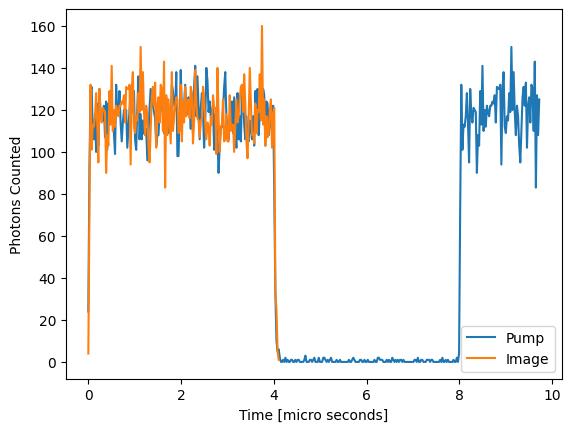

AOM voltage: 0.9
Configuration sent to red pitaya
configured pulse blaster
Windfreak Rabi configuration sent: 2896 0 0
new rabi measurement started
recived new data, bytes: 4096
All the data was recived
disconnect from Red Pitaya
Connecting to red pitaya: 132.72.13.15 1001
0.6000000000000001 0.29075638911788965


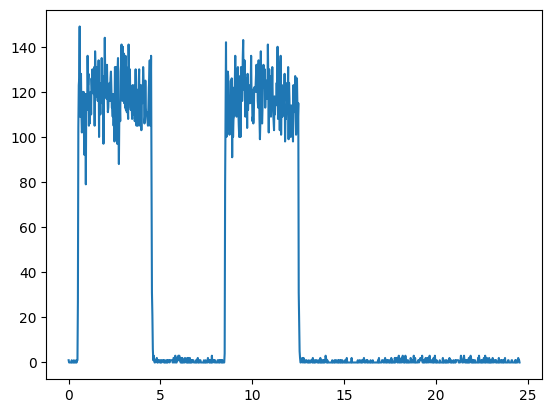

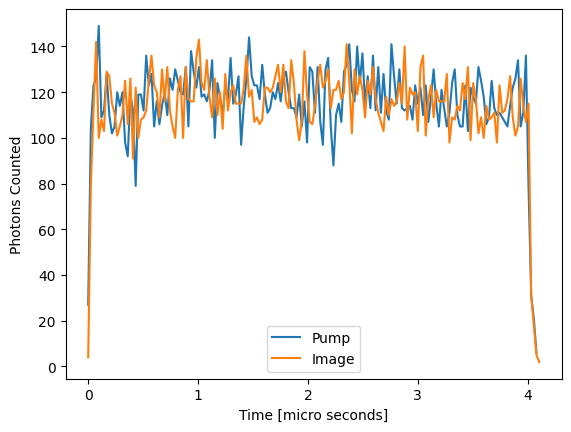

AOM voltage: 0.9
Configuration sent to red pitaya
configured pulse blaster
Windfreak Rabi configuration sent: 2896 0 0
new rabi measurement started
recived new data, bytes: 4096
All the data was recived
disconnect from Red Pitaya
Connecting to red pitaya: 132.72.13.15 1001
0.8 0.29890348608668665


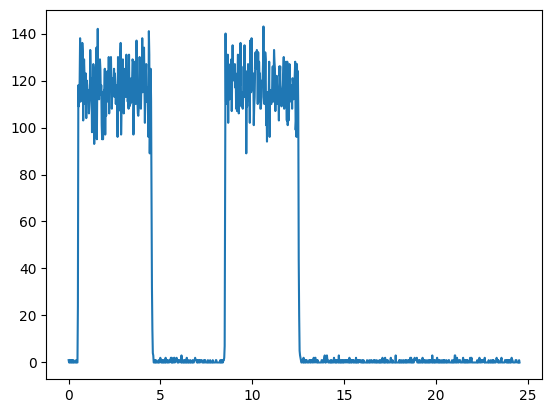

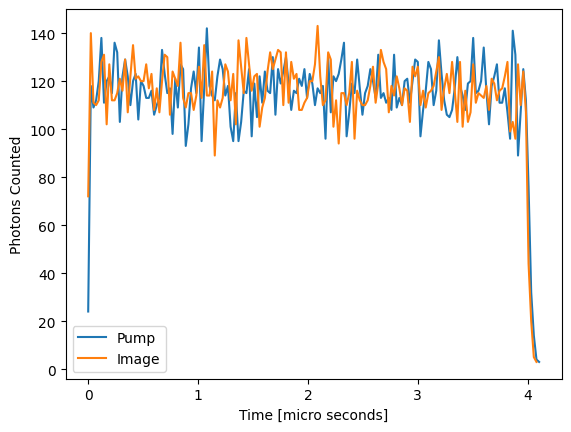

AOM voltage: 0.9
Configuration sent to red pitaya
configured pulse blaster
Windfreak Rabi configuration sent: 2896 0 0
new rabi measurement started
recived new data, bytes: 4096
All the data was recived
disconnect from Red Pitaya
Connecting to red pitaya: 132.72.13.15 1001
1.0 0.29102358953182283


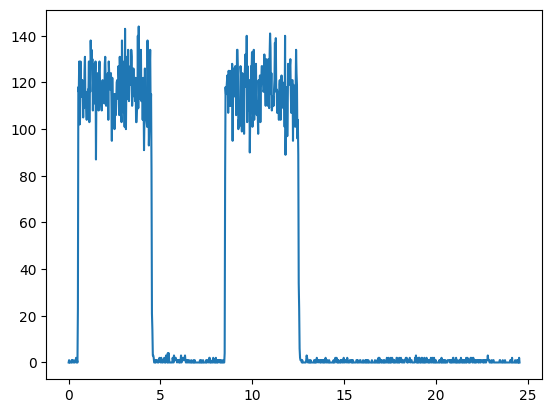

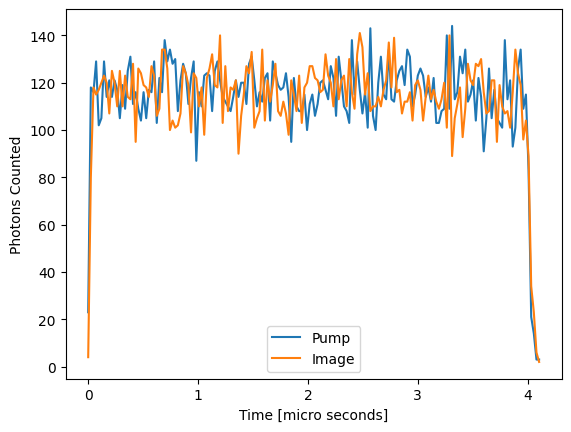

AOM voltage: 0.9
Configuration sent to red pitaya
configured pulse blaster
Windfreak Rabi configuration sent: 2896 0 0
new rabi measurement started
recived new data, bytes: 4096
All the data was recived
disconnect from Red Pitaya
Connecting to red pitaya: 132.72.13.15 1001
1.2000000000000002 0.2886029411764707


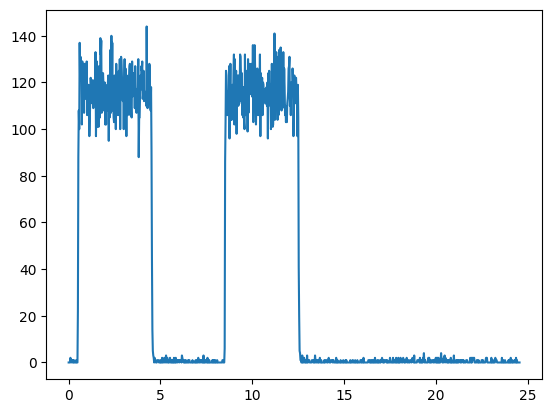

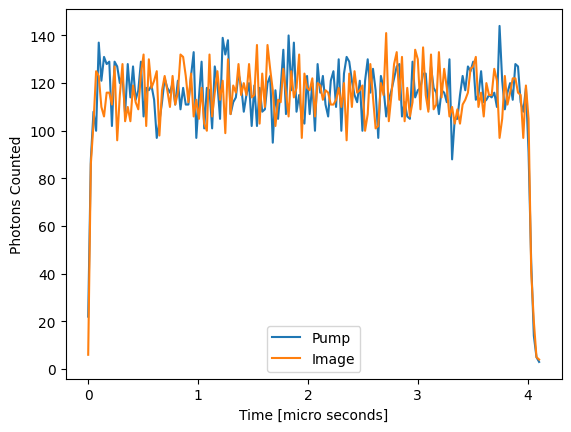

AOM voltage: 0.9
Configuration sent to red pitaya
configured pulse blaster
Windfreak Rabi configuration sent: 2896 0 0
new rabi measurement started
recived new data, bytes: 4096
All the data was recived
disconnect from Red Pitaya
Connecting to red pitaya: 132.72.13.15 1001
1.4000000000000001 0.14819270806088827


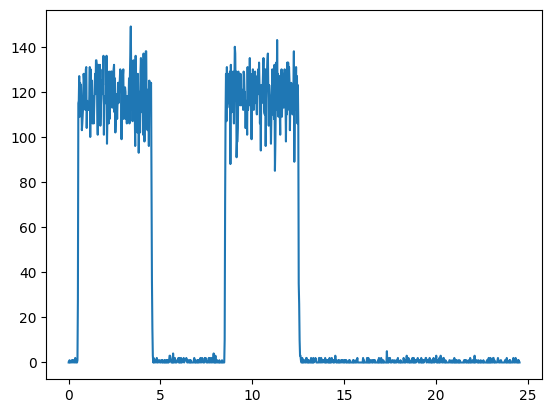

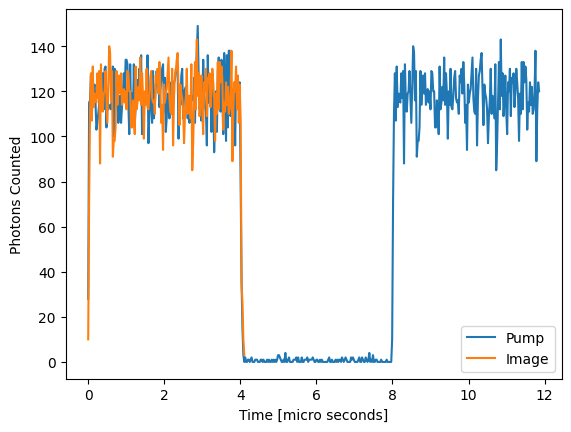

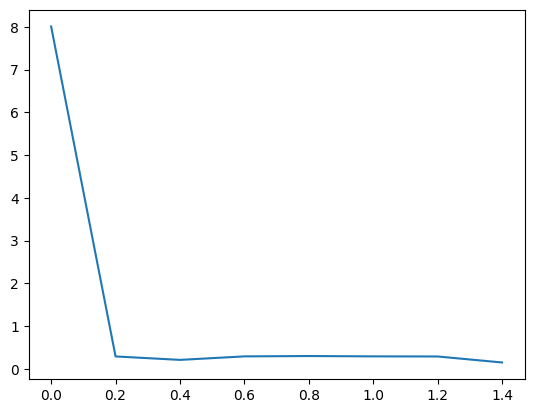

In [5]:
for d,t in scan_manager.startScan(pulseConfig, microwaveConfig, 0, 1.5, 0.2):
    print(t, d)
    data = scan_manager.measurementData[t]
    plt.plot(data[scan_manager.measurementManager.RabiXAxisLabel], data[scan_manager.measurementManager.RabiYAxisLabel])
    plt.show()
    plotPulsesData(data)

plt.plot(scan_manager.extractedData_dima.keys(), scan_manager.extractedData_dima.values())
plt.show()

In [6]:
data_saver = dataSaver(scan_manager.measurementManager, scan_manager)

In [7]:
data_saver.saveCompleteScan("hiii", "rabi_scan_test_2")

D:\Experiments\2023-12-27\Scans\rabi_scan_test_2.pkl
D:\Experiments\2023-12-27\Scans\rabi_scan_test_2.pkl
D:\Experiments\2023-12-27\Scans\rabi_scan_test_2.pkl
D:\Experiments\2023-12-27\Scans\rabi_scan_test_2.pkl
D:\Experiments\2023-12-27\Scans\rabi_scan_test_2.pkl
D:\Experiments\2023-12-27\Scans\rabi_scan_test_2.pkl
D:\Experiments\2023-12-27\Scans\rabi_scan_test_2.pkl
D:\Experiments\2023-12-27\Scans\rabi_scan_test_2.pkl
D:\Experiments\2023-12-27\Scans\rabi_scan_test_2.pkl


In [9]:
meta, data = data_saver.loadCompleteScan(r"D:\Experiments\2023-12-27\Scans\rabi_scan_test.pkl")

Measurement type               RabiPulse
RF Power [dBm]                         0
Measurement Duration [us]              1
Comment                             hiii
MW frequency [MHz]                  2896
Pump pulse time [us]                   0
Pump pulse duration [us]               4
MW pulse time [us]                     5
MW pulse duration [us]               0.0
Imaging pulse time [us]                8
Imaging Pulse duration [us]            4
Readout pulse time [us]                0
Number of Iterations:               1000
dtype: object


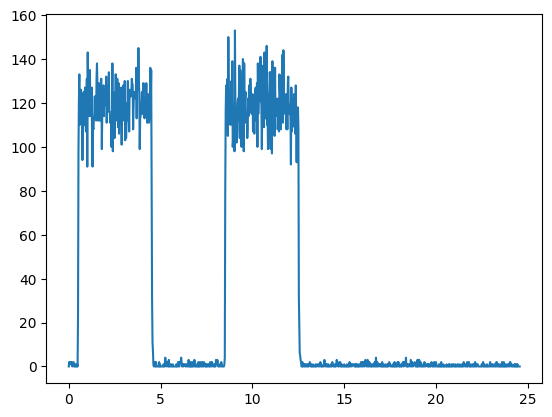

Measurement type               RabiPulse
RF Power [dBm]                         0
Measurement Duration [us]              1
Comment                             hiii
MW frequency [MHz]                  2896
Pump pulse time [us]                   0
Pump pulse duration [us]               4
MW pulse time [us]                     5
MW pulse duration [us]               0.2
Imaging pulse time [us]                8
Imaging Pulse duration [us]            4
Readout pulse time [us]                0
Number of Iterations:               1000
dtype: object


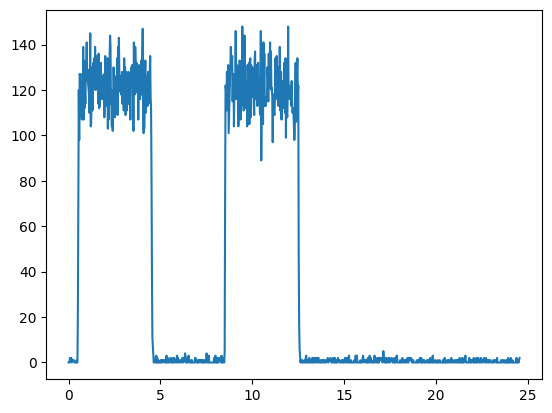

Measurement type               RabiPulse
RF Power [dBm]                         0
Measurement Duration [us]              1
Comment                             hiii
MW frequency [MHz]                  2896
Pump pulse time [us]                   0
Pump pulse duration [us]               4
MW pulse time [us]                     5
MW pulse duration [us]               0.4
Imaging pulse time [us]                8
Imaging Pulse duration [us]            4
Readout pulse time [us]                0
Number of Iterations:               1000
dtype: object


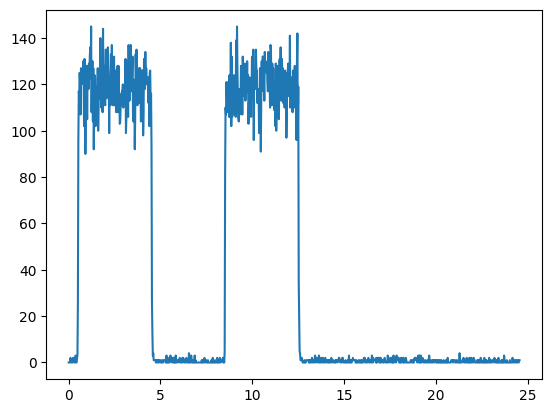

Measurement type               RabiPulse
RF Power [dBm]                         0
Measurement Duration [us]              1
Comment                             hiii
MW frequency [MHz]                  2896
Pump pulse time [us]                   0
Pump pulse duration [us]               4
MW pulse time [us]                     5
MW pulse duration [us]               0.6
Imaging pulse time [us]                8
Imaging Pulse duration [us]            4
Readout pulse time [us]                0
Number of Iterations:               1000
dtype: object


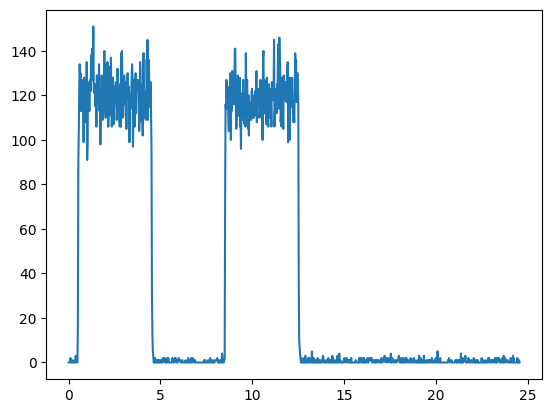

Measurement type               RabiPulse
RF Power [dBm]                         0
Measurement Duration [us]              1
Comment                             hiii
MW frequency [MHz]                  2896
Pump pulse time [us]                   0
Pump pulse duration [us]               4
MW pulse time [us]                     5
MW pulse duration [us]               0.8
Imaging pulse time [us]                8
Imaging Pulse duration [us]            4
Readout pulse time [us]                0
Number of Iterations:               1000
dtype: object


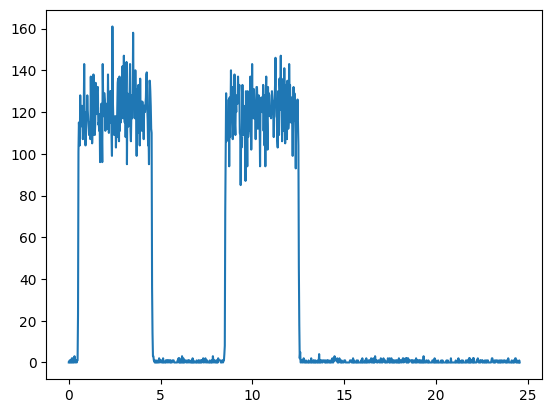

Measurement type               RabiPulse
RF Power [dBm]                         0
Measurement Duration [us]              1
Comment                             hiii
MW frequency [MHz]                  2896
Pump pulse time [us]                   0
Pump pulse duration [us]               4
MW pulse time [us]                     5
MW pulse duration [us]               1.0
Imaging pulse time [us]                8
Imaging Pulse duration [us]            4
Readout pulse time [us]                0
Number of Iterations:               1000
dtype: object


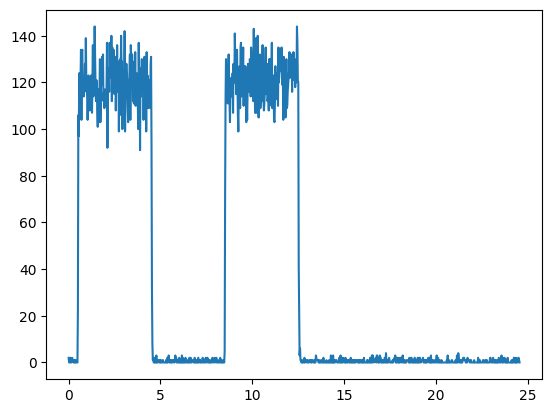

Measurement type               RabiPulse
RF Power [dBm]                         0
Measurement Duration [us]              1
Comment                             hiii
MW frequency [MHz]                  2896
Pump pulse time [us]                   0
Pump pulse duration [us]               4
MW pulse time [us]                     5
MW pulse duration [us]               1.2
Imaging pulse time [us]                8
Imaging Pulse duration [us]            4
Readout pulse time [us]                0
Number of Iterations:               1000
dtype: object


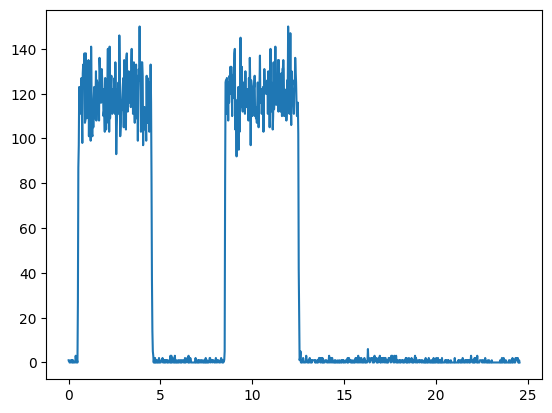

Measurement type               RabiPulse
RF Power [dBm]                         0
Measurement Duration [us]              1
Comment                             hiii
MW frequency [MHz]                  2896
Pump pulse time [us]                   0
Pump pulse duration [us]               4
MW pulse time [us]                     5
MW pulse duration [us]               1.4
Imaging pulse time [us]                8
Imaging Pulse duration [us]            4
Readout pulse time [us]                0
Number of Iterations:               1000
dtype: object


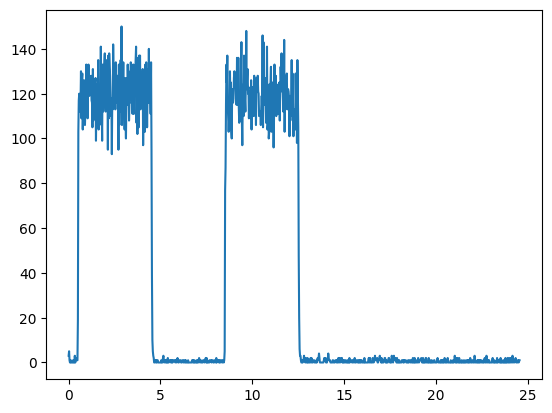

In [12]:
for i in range(len(data) - 1):
    print(meta[i])
    plt.plot(data[i]["Time [micro seconds]"],data[i]["Photons Counted"])
    plt.show()
    